<a href="https://colab.research.google.com/github/LinggarM/Pima-Indians-Diabetes-Classification-using-Various-Supervised-Algorithms/blob/main/pengenalan_pola_Studi_Kasus_Pima_Indians_Diabetes_tanpa_standarisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

df_diabetes = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Pengenalan Pola/diabetes.csv')

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


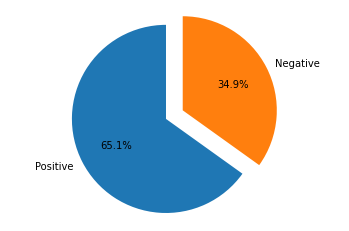

In [ ]:
import matplotlib.pyplot as plt

outcome_count = df_diabetes['Outcome'].value_counts()
outcome_count

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative'
sizes = outcome_count
explode = (0.1,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# memisahkan atribut fitur (selain target/ kelas prediksi)
x = df_diabetes[df_diabetes.columns[:8]]
 
# memisahkan target/ kelas prediksi (0 dan 1)
y = df_diabetes['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# memisahkan data untuk training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

In [ ]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

## **Using Random Forest**

In [ ]:
RF_model = RandomForestClassifier(**parameters)

In [ ]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_predictions = RF_model.predict(x_test)

In [ ]:
score = accuracy_score(y_test ,RF_predictions)
print('Accuracy Random Forest Model:',score)

Accuracy Random Forest Model: 0.8020833333333334


## **Using Neural Network**

In [ ]:
# Build a neural network :
NN_model = Sequential()

NN_model.add(Dense(256, input_dim = x.shape[1], activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint_name = 'BestWeights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_accuracy', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

In [ ]:
t0_nn = time()
NN_model.fit(x_train, y_train, epochs=150, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
train_test_time = time() - t0_nn

Epoch 1/150
8/8 [==============================] - 1s 79ms/step - loss: 2.3177 - accuracy: 0.5082 - val_loss: 1.2266 - val_accuracy: 0.3793

Epoch 00001: val_accuracy improved from -inf to 0.37931, saving model to BestWeights.hdf5
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.9897 - accuracy: 0.5259 - val_loss: 0.7045 - val_accuracy: 0.6810

Epoch 00002: val_accuracy improved from 0.37931 to 0.68103, saving model to BestWeights.hdf5
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6212 - accuracy: 0.6651 - val_loss: 0.7121 - val_accuracy: 0.5776

Epoch 00003: val_accuracy did not improve from 0.68103
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6606 - accuracy: 0.6303 - val_loss: 0.7662 - val_accuracy: 0.6293

Epoch 00004: val_accuracy did not improve from 0.68103
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6699 - accuracy: 0.6598 - val_loss: 0.7917 - val_accuracy: 0.6897

Ep

In [ ]:
# Load wights file of the best model :
wights_file = './BestWeights.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load weights
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
predictions = NN_model.predict(x_test)

In [ ]:
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded

In [ ]:
score = accuracy_score(y_test ,predictions)
print('Test Accuracy:',score)

Test Accuracy: 0.703125


## **Other Classifier**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
names = [ 'Neural Network',
          'Logistic Regression',
          'SVC',
          'Gradient Boosting Classifier',
          'Extra Trees Classifier',
          'Bagging Classifier',
          'AdaBoost Classifier',
          'Gaussian NB',
          'MLP Classifier',
          'XGB Classifier',
          'LGBM Classisfier',
          "K Nearest Neighbour Classifier",
          "Decison Tree Classifier",
          "Random Forest Classifier",
         ]
classifiers = [
    NN_model,           
    LogisticRegression(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
        ]

# Zipped all architecture
zipped_clf = zip(names,classifiers)

In [ ]:
import warnings
# untuk menghapus warning
warnings.filterwarnings('ignore')

# fungsi accuracy testing 
def acc_summary(model, train_X, train_y, val_X, val_y):
    t0 = time()
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(val_y, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# fungsi komparator
def classifier_comparator(train_X,train_y,val_X,val_y,classifier=zipped_clf):
    result = []
    for n,c in classifier:
      if n=='Neural Network': # for only neural network
        predictions = NN_model.predict(x_test)
        # round predictions
        rounded = [round(x[0]) for x in predictions]
        predictions = rounded
        score = accuracy_score(val_y, predictions)*100
        print("Test result for {}".format(n))
        print("train and test time: {0:.2f}s".format(train_test_time))
        print("accuracy : {0:.2f}%".format(score))
        print("-"*80)
        result.append((c,n,score,train_test_time))
      else:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,train_X, train_y, val_X, val_y)
        result.append((c,n,clf_acc,tt_time))
    return result

In [ ]:
result = classifier_comparator(x_train, y_train, x_test, y_test)

Test result for Neural Network
train and test time: 18.03s
accuracy : 70.31%
--------------------------------------------------------------------------------
Validation result for Logistic Regression
accuracy : 79.17%
train and test time: 0.03s
--------------------------------------------------------------------------------
Validation result for SVC
accuracy : 77.08%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier
accuracy : 80.21%
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
accuracy : 76.04%
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for Bagging Classifier
accuracy : 77.08%
train and test time: 0.03s
--------------------------------------------------------------------------------
Validat

## **Plotting**

In [ ]:
# Plotting models
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get name and score models
n = [v[1] for v in result]
s = [v[2] for v in result]

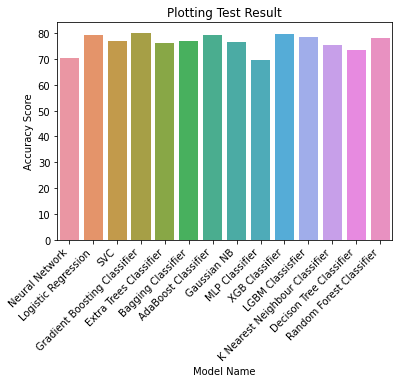

In [ ]:
# Visualisasi model
plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Test Result")
plt.xlabel('Model Name')

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()

## **Feature Importance**

In [ ]:
# get best models [-1] is random forest and next [0] is index to model to get feature importance, and zipped with X column  
importances = sorted([(a,b) for a,b in zip(result[-1][0].feature_importances_, x.columns)],reverse=True)
n = [ni for si,ni in importances]
s = [si for si,ni in importances]

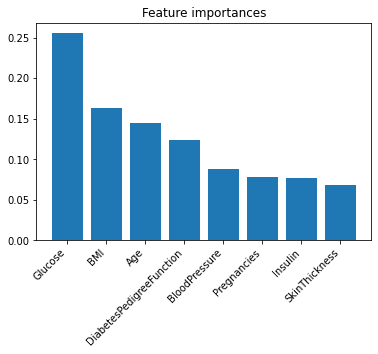

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(n,s)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

## **Ensemble Learning**

In [ ]:
# Install and Import Dependencies
!pip install vecstack
from vecstack import stacking 

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=087966139a3e970b30807475ca1e31b397f19f285c47a1c21963b66e9acbafc5
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [ ]:
# get all models, 1-st level.
models = [v[0] for v in result[1:]] # tanpa neural network
print('Number of model:',len(models))

t0 = time()

# Compute stacking features
S_train, S_test = stacking(models, x_train, y_train, x_test, n_folds = 3, metric=accuracy_score, shuffle = True, random_state = 7, verbose = 1)

# Initialize 2-nd level model
model = models[-1]

# Fit 2-nd level model
model = model.fit(S_train, y_train)

# Predict
y_test_pred = model.predict(S_test)

train_test_time = time() - t0

Number of model: 13
task:         [regression]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [13]

model  0:     [LogisticRegression]
    ----
    MEAN:     [0.76041667] + [0.01473139]
    FULL:     [0.76041667]

model  1:     [SVC]
    ----
    MEAN:     [0.72222222] + [0.02009694]
    FULL:     [0.72222222]

model  2:     [GradientBoostingClassifier]
    ----
    MEAN:     [0.74479167] + [0.01533292]
    FULL:     [0.74479167]

model  3:     [ExtraTreesClassifier]
    ----
    MEAN:     [0.73958333] + [0.02250257]
    FULL:     [0.73958333]

model  4:     [BaggingClassifier]
    ----
    MEAN:     [0.75000000] + [0.01533292]
    FULL:     [0.75000000]

model  5:     [AdaBoostClassifier]
    ----
    MEAN:     [0.72743056] + [0.02734031]
    FULL:     [0.72743056]

model  6:     [GaussianNB]
    ----
    MEAN:     [0.75520833] + [0.02655739]
    FULL:     [0.75520833]

model  7:     [MLPClassifier]
    ----
    MEAN:     [0.68402778] + [0.01718662]
    FULL

In [ ]:
## Print vecstack result 
accuracy = accuracy_score(y_test, y_test_pred)*100
print("Stacking accuracy : {0:.2f}%".format(accuracy))
print("train and test time: {0:.2f}s".format(train_test_time))

Stacking accuracy : 77.08%
train and test time: 3.66s
